# 🧬 Chapitre : Résultats  
Ce notebook présente les résultats d’analyses statistiques et de visualisations graphiques menées dans le cadre des travaux de doctorat de troisième cycle (LMD) en biologie, spécialité microbiologie, intitulés *« Recherche d’antibiotiques d’origine actinobactérienne actifs contre les bactéries impliquées dans les infections communautaires »*, réalisés par BENMOUMOU Sarra.

## 🎯 Objectif du présent notebook

Ce chapitre vise à analyser les relations potentielles entre différentes variables cliniques et microbiologiques à partir des jeux de données collectés. L’approche adoptée combine :

- 🔍 **Des visualisations exploratoires** pour une représentation intuitive des relations entre variables.
- 📊 **Des tests statistiques** rigoureux pour valider ou infirmer des hypothèses d’association.

Ces analyses s’inscrivent dans le cadre de l’évaluation de la résistance aux antibiotiques et des profils de multi-résistance chez des souches bactériennes isolées.

---

## 🧪 Hypothèses explorées et visualisations associées

Afin de mieux comprendre les dynamiques entre les variables, plusieurs visualisations seront réalisées, notamment sous forme d’**histogrammes** et de **diagrammes en violon**. Ces représentations graphiques seront accompagnées de tests statistiques appropriés.

Voici la liste des relations étudiées :

1. **Espèce bactérienne et genre**  
2. **Espèce bactérienne et catégorie d’âge**  
3. **Catégorie d’âge et résistance aux antibiotiques**  
4. **Genre et résistance aux antibiotiques**  
5. **Espèce bactérienne et résistance aux antibiotiques**  
6. **Multi-résistance et genre**  
7. **Multi-résistance et catégorie d’âge**  
8. **Multi-résistance et espèce bactérienne**  
9. **Multi-résistance et résistance aux différentes classes d’antibiotiques**

---

## 🧰 Méthodologie d’analyse

Chaque relation sera abordée en deux étapes :

- **Visualisation exploratoire** : afin d’observer la distribution et les tendances générales des variables.
- **Test statistique** : pour évaluer la significativité des associations observées, selon la nature des variables (qualitatives ou quantitatives) et la taille des échantillons.

Les tests statistiques utilisés incluent :

- ✅ **Test du Chi² d’indépendance** : pour les associations entre variables catégorielles.
- ✅ **Test exact de Fisher** : pour les échantillons de petite taille.
- ✅ **Test d’ANOVA ou de Kruskal-Wallis** : pour comparer des moyennes sur plusieurs groupes (si applicable).

---

L’ensemble des résultats présentés ci-dessous permettra de formuler des interprétations fondées sur des données quantitatives, tout en illustrant les profils épidémiologiques des souches bactériennes étudiées.


In [35]:
import pandas as pd
import seaborn as sns

familes = ['lactams ',
'Aminoglycosides ',
'Quinolones',
'Phenicols',
'Sulfonamides',
'Nitrofurans',
'Polymyxins']

In [2]:
df = pd.read_excel('profil_bacterie.xlsx')
df=df.drop('id',1)
df.head()


<ipython-input-2-d75a75e4de7f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('id',1)


,strain,Species,age/gender,AMP,AMX+Acclavulanique,CZ,FOX,CTX/CRO,IPM,GEN,AN,Acide nalidixique,ofx,CIP,C,Co-trimoxazole,Furanes,colistine
0,290,S290 Klebsiella pneumoniae,46/F,R,R,S,S,S,S,S,S,R,R,R,S,S,S,S
1,299,S299 E.coli,71/F,R,R,S,S,S,S,S,S,R,R,R,R,S,S,S
2,308,S308 E.coli,30/h,R,R,S,S,S,S,S,S,S,S,S,S,R,S,S
3,313,S313 Proteus mirabilis,03/F,R,R,S,S,S,S,S,S,S,S,S,S,S,S,S
4,314,S314 Salmonella typhi,14/F,R,R,S,S,S,S,S,S,S,S,S,S,R,S,S


# 1. Prétraitement des données : extraction des variables, nettoyage et regroupement des classes de résistance

Cette section du code effectue plusieurs étapes de prétraitement essentielles pour structurer correctement les données avant l’analyse.

- Séparation de l’âge et du sexe :
    La variable combinée age/gender, qui contient à la fois l’âge et le sexe séparés par un caractère /, est divisée en deux colonnes distinctes :

        age : convertie en entier après avoir été extraite sous forme flottante.

        gender : extraite en tant que chaîne de caractères.

- Nettoyage des valeurs de la colonne gender :
    Certaines valeurs mal saisies sont corrigées :

        " F" est remplacé par "F"

        "h" est remplacé par "H"

- Ces corrections assurent l’homogénéité des données de genre.

    Création de variables indicatrices pour les familles d'antibiotiques :
    Le code crée de nouvelles colonnes binaires (0 ou 1) indiquant si la souche est résistante à au moins un antibiotique dans chaque famille :

        β-lactamines (lactams)

        Aminosides (Aminoglycosides)

        Quinolones

        Phénicolés (Phenicols)

        Sulfamides (Sulfonamides)

        Nitrofuranes

        **Polymyxines`

    Cela permet de synthétiser la résistance en groupes thérapeutiques plutôt qu'antibiotique par antibiotique.

- Correction des noms d’espèces bactériennes :
    Des erreurs typographiques dans la colonne Species sont corrigées manuellement, notamment :

        "EntÈrobacter cloaceae" devient "Enterobacter cloaceae"

        "E .coli " devient "E.coli"

    Nettoyage automatique des identifiants parasites dans les noms d’espèces :
    Des expressions régulières sont utilisées pour supprimer des préfixes numériques ou identifiants du type S123, souvent présents dans les fichiers bruts, afin d’uniformiser les noms d’espèces.

In [45]:
df['age'] = (df['age/gender'].str.split('/', expand=True)[0]).astype(float)
df['gender'] = df['age/gender'].str.split('/', expand=True)[1]
df=df.drop('age/gender',1)
df['age']=df['age'].astype(int)
df.head()



<ipython-input-45-fcc598e168b8>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('age/gender',1)


,strain,Species,AMP,AMX+Acclavulanique,CZ,FOX,CTX/CRO,IPM,GEN,AN,Acide nalidixique,ofx,CIP,C,Co-trimoxazole,Furanes,colistine,age,gender
0,290,S290 Klebsiella pneumoniae,R,R,S,S,S,S,S,S,R,R,R,S,S,S,S,46,F
1,299,S299 E.coli,R,R,S,S,S,S,S,S,R,R,R,R,S,S,S,71,F
2,308,S308 E.coli,R,R,S,S,S,S,S,S,S,S,S,S,R,S,S,30,h
3,313,S313 Proteus mirabilis,R,R,S,S,S,S,S,S,S,S,S,S,S,S,S,3,F
4,314,S314 Salmonella typhi,R,R,S,S,S,S,S,S,S,S,S,S,R,S,S,14,F


In [46]:
df['gender'][df['gender']==" F"]="F"
df['gender'][df['gender']=="h"]="H"
df['gender'].value_counts()

<ipython-input-46-4f25adccadf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'][df['gender']==" F"]="F"
<ipython-input-46-4f25adccadf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'][df['gender']=="h"]="H"


F    98
H    18
Name: gender, dtype: int64

In [48]:
df['lactams'] = (df.iloc[:, 2:7] == 'R').any(axis=1).astype(int)
df['Aminoglycosides'] = (df.iloc[:, 8:9] == 'R').any(axis=1).astype(int)
df['Quinolones'] = (df.iloc[:, 10:12] == 'R').any(axis=1).astype(int)
df['Phenicols'] = (df.iloc[:, 13] == 'R').astype(int)
df['Sulfonamides'] = (df.iloc[:, 14] == 'R').astype(int)
df['Nitrofurans'] = (df.iloc[:, 15] == 'R').astype(int)
df['Polymyxins'] = (df.iloc[:, 16] == 'R').astype(int)

cols=['lactams','Aminoglycosides',"Quinolones",'Phenicols','Sulfonamides','Nitrofurans',"Polymyxins"]



In [49]:
df.head()

,strain,Species,AMP,AMX+Acclavulanique,CZ,FOX,CTX/CRO,IPM,GEN,AN,...,colistine,age,gender,lactams,Aminoglycosides,Quinolones,Phenicols,Sulfonamides,Nitrofurans,Polymyxins
0,290,S290 Klebsiella pneumoniae,R,R,S,S,S,S,S,S,...,S,46,F,1,0,1,0,0,0,0
1,299,S299 E.coli,R,R,S,S,S,S,S,S,...,S,71,F,1,0,1,1,0,0,0
2,308,S308 E.coli,R,R,S,S,S,S,S,S,...,S,30,H,1,0,0,0,1,0,0
3,313,S313 Proteus mirabilis,R,R,S,S,S,S,S,S,...,S,3,F,1,0,0,0,0,0,0
4,314,S314 Salmonella typhi,R,R,S,S,S,S,S,S,...,S,14,F,1,0,0,0,1,0,0


In [50]:
Old_df= df.copy()
df_profiles= df[['AMP', 'AMX+Acclavulanique', 'CZ', 'FOX',
       'CTX/CRO', 'IPM', 'GEN', 'AN', 'Acide nalidixique', 'ofx', 'CIP', 'C',
       'Co-trimoxazole', 'Furanes', 'colistine', ]]
df=df.drop(['AMP', 'AMX+Acclavulanique', 'CZ', 'FOX',
       'CTX/CRO', 'IPM', 'GEN', 'AN', 'Acide nalidixique', 'ofx', 'CIP', 'C',
       'Co-trimoxazole', 'Furanes', 'colistine', ],1)
df.head()

<ipython-input-50-b374fd6056b2>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(['AMP', 'AMX+Acclavulanique', 'CZ', 'FOX',


,strain,Species,age,gender,lactams,Aminoglycosides,Quinolones,Phenicols,Sulfonamides,Nitrofurans,Polymyxins
0,290,S290 Klebsiella pneumoniae,46,F,1,0,1,0,0,0,0
1,299,S299 E.coli,71,F,1,0,1,1,0,0,0
2,308,S308 E.coli,30,H,1,0,0,0,1,0,0
3,313,S313 Proteus mirabilis,3,F,1,0,0,0,0,0,0
4,314,S314 Salmonella typhi,14,F,1,0,0,0,1,0,0


In [51]:
df['Species'] = df['Species'].str.replace(r'S\d+\s+', '')
df['Species'] = df['Species'].str.replace(r'S \d+\s+', '')
df['Species'] = df['Species'].str.replace(r'\d+\s+', '')

df.head()


<ipython-input-51-1766b68d9918>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Species'] = df['Species'].str.replace(r'S\d+\s+', '')
<ipython-input-51-1766b68d9918>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Species'] = df['Species'].str.replace(r'S \d+\s+', '')
<ipython-input-51-1766b68d9918>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Species'] = df['Species'].str.replace(r'\d+\s+', '')


,strain,Species,age,gender,lactams,Aminoglycosides,Quinolones,Phenicols,Sulfonamides,Nitrofurans,Polymyxins
0,290,Klebsiella pneumoniae,46,F,1,0,1,0,0,0,0
1,299,E.coli,71,F,1,0,1,1,0,0,0
2,308,E.coli,30,H,1,0,0,0,1,0,0
3,313,Proteus mirabilis,3,F,1,0,0,0,0,0,0
4,314,Salmonella typhi,14,F,1,0,0,0,1,0,0


In [52]:
df['gender'][df['gender']==" F"]="F"
df['gender'][df['gender']=="h"]="H"
df['gender'][df['gender']=='H']='Male'
df['gender'][df['gender']=='F']='Female'
df.head()

<ipython-input-52-b3a8af5af70c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'][df['gender']==" F"]="F"
<ipython-input-52-b3a8af5af70c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'][df['gender']=="h"]="H"
<ipython-input-52-b3a8af5af70c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'][df['gender']=='H']='Male'
<ipython-input-52-b3a8af5af70c>:4: SettingWithCopyWarning: 
A value is trying to be 

,strain,Species,age,gender,lactams,Aminoglycosides,Quinolones,Phenicols,Sulfonamides,Nitrofurans,Polymyxins
0,290,Klebsiella pneumoniae,46,Female,1,0,1,0,0,0,0
1,299,E.coli,71,Female,1,0,1,1,0,0,0
2,308,E.coli,30,Male,1,0,0,0,1,0,0
3,313,Proteus mirabilis,3,Female,1,0,0,0,0,0,0
4,314,Salmonella typhi,14,Female,1,0,0,0,1,0,0


In [53]:
df['Species'][df['Species']=="EntÈrobacter cloaceae"]="Enterobacter cloaceae"
df['Species'][df['Species']=="E .coli "]="E.coli"


<ipython-input-53-c927dd8933e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'][df['Species']=="EntÈrobacter cloaceae"]="Enterobacter cloaceae"
<ipython-input-53-c927dd8933e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'][df['Species']=="E .coli "]="E.coli"


In [54]:
df3=df.copy()

In [55]:
df2=df3.copy()

mask = df2['Species'].str.contains('E.coli')
df2.loc[mask, 'Species'] = 'E.coli'
mask = df2['Species'].str.contains('E. coli')
df2.loc[mask, 'Species'] = 'E.coli'

In [56]:
mask = df2['Species'].str.contains('Klebsiella oxy')
df2.loc[mask, 'Species'] = 'Klebsiella oxycota'

In [57]:
mask = df2['Species'].str.contains('Klebsiella pne')
df2.loc[mask, 'Species'] = 'klebsiella pneumoniae'

In [58]:
df2['Species'].value_counts()

E.coli                      76
klebsiella pneumoniae       13
Proteus mirabilis           13
Klebsiella oxycota           3
Enterobacter cloaceae        3
Enterobacter aerogenes       2
Salmonella typhi             1
Enterobacter spp.            1
Citrobacter spp.             1
Escherichia vulneris         1
Citrobacter koseri           1
Yersinia enterocolitica      1
Name: Species, dtype: int64

In [59]:
df =df2
df.head()

,strain,Species,age,gender,lactams,Aminoglycosides,Quinolones,Phenicols,Sulfonamides,Nitrofurans,Polymyxins
0,290,klebsiella pneumoniae,46,Female,1,0,1,0,0,0,0
1,299,E.coli,71,Female,1,0,1,1,0,0,0
2,308,E.coli,30,Male,1,0,0,0,1,0,0
3,313,Proteus mirabilis,3,Female,1,0,0,0,0,0,0
4,314,Salmonella typhi,14,Female,1,0,0,0,1,0,0


In [60]:
df2.groupby('gender')['Species'].value_counts()
df2['Species'].value_counts()

E.coli                      76
klebsiella pneumoniae       13
Proteus mirabilis           13
Klebsiella oxycota           3
Enterobacter cloaceae        3
Enterobacter aerogenes       2
Salmonella typhi             1
Enterobacter spp.            1
Citrobacter spp.             1
Escherichia vulneris         1
Citrobacter koseri           1
Yersinia enterocolitica      1
Name: Species, dtype: int64

In [61]:
df['multi_resistance'] = df[['lactams', 'Aminoglycosides', 'Quinolones', 'Phenicols', 'Sulfonamides', 'Nitrofurans', 'Polymyxins']].sum(axis=1)
df.head()

,strain,Species,age,gender,lactams,Aminoglycosides,Quinolones,Phenicols,Sulfonamides,Nitrofurans,Polymyxins,multi_resistance
0,290,klebsiella pneumoniae,46,Female,1,0,1,0,0,0,0,2
1,299,E.coli,71,Female,1,0,1,1,0,0,0,3
2,308,E.coli,30,Male,1,0,0,0,1,0,0,2
3,313,Proteus mirabilis,3,Female,1,0,0,0,0,0,0,1
4,314,Salmonella typhi,14,Female,1,0,0,0,1,0,0,2


In [62]:
df[df['multi_resistance']>=3].groupby('Species').value_counts()

Species                strain  age  gender  lactams  Aminoglycosides  Quinolones  Phenicols  Sulfonamides  Nitrofurans  Polymyxins  multi_resistance
Citrobacter spp.       563     57   Female  1        0                0           0          1             1            0           3                   1
E.coli                 299     71   Female  1        0                1           1          0             0            0           3                   1
                       826     82   Female  1        0                1           0          1             0            0           3                   1
                       595     60   Female  1        0                1           0          1             0            0           3                   1
                       451     59   Female  1        0                1           0          1             1            0           4                   1
                       427     87   Male    1        0                0          

In [7]:
file_path = 'The_newest_datafinal.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1',index_col=0)
data

,strain,Species,age,gender,lactams,Aminoglycosides,Quinolones,Phenicols,Sulfonamides,Nitrofurans,Polymyxins,multi_resistance
0,290,klebsiella pneumoniae,46,Femme,1,0,1,0,0,0,0,0
1,299,E.coli,71,Femme,1,0,1,1,0,0,0,1
2,308,E.coli,30,Homme,1,0,0,0,1,0,0,0
3,313,Proteus mirabilis,3,Femme,1,0,0,0,0,0,0,0
4,314,Salmonella typhi,14,Femme,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,953M,Staphylococcus saprophiticus,55,Femme,0,0,0,0,0,0,0,1
129,966,Staphylococcus saprophiticus,39,Femme,0,0,0,0,0,0,0,0
130,974,Staphylococcus saprophiticus,39,Femme,0,0,0,0,0,0,0,0
131,1030,Staphylococcus saprophiticus,32,Femme,0,0,0,0,0,0,0,0


# 2. Visualisation et analyse statistique des profils de résistance

Cette partie vise à explorer visuellement les données et à appliquer des tests statistiques afin de mieux comprendre les relations entre les caractéristiques des isolats bactériens (espèce, âge, sexe) et leurs profils de résistance aux antibiotiques. Des graphiques descriptifs permettent de dégager des tendances générales, tandis que des tests comme le Chi² ou le test exact de Fisher sont utilisés pour évaluer la significativité des associations observées.

In [69]:

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file with 'ISO-8859-1' encoding
file_path = 'The_newest_datafinal.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1',index_col=0)

data_clean = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])
data_clean.to_csv(file_path,index=False)
data.head()


,strain,Species,age,gender,lactams,Aminoglycosides,Quinolones,Phenicols,Sulfonamides,Nitrofurans,Polymyxins,multi_resistance
0,290,klebsiella pneumoniae,46.0,Female,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,299,E.coli,71.0,Female,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,308,E.coli,30.0,Male,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,313,Proteus mirabilis,3.0,Female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,314,Salmonella typhi,14.0,Female,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
file_path = 'The_newest_datafinal.csv'  # Replace with your file path
df = pd.read_csv(file_path,encoding='latin1',index_col=0)
df['gender'][df['gender']=='Male']='Homme'
df['gender'][df['gender']=='Female']='Femme'
df.head()


## 1. Visualisation et comparaison de l’âge selon le sexe

Dans cette section, nous explorons la distribution de l’âge selon le sexe des patients. La variable `gender` est filtrée pour ne conserver que les individus identifiés comme "Homme" ou "Femme". Un **graphique de type violon** (violin plot) est ensuite généré pour visualiser la distribution de l’âge au sein de chaque groupe. Ce type de graphique combine les informations d’un boxplot avec une estimation de la densité de probabilité, permettant d’observer à la fois la médiane, la dispersion et la forme de la distribution.

Le graphique est sauvegardé au format PDF dans un répertoire spécifié.






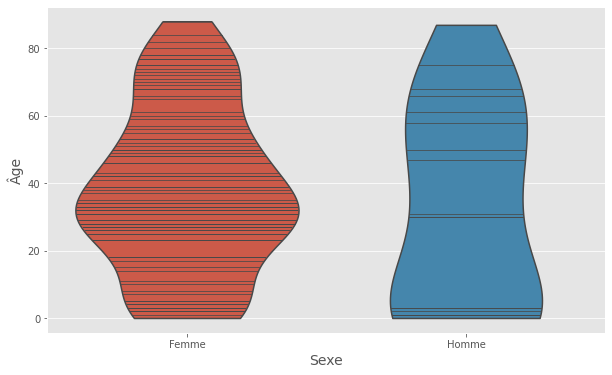

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
file_path = 'The_newest_datafinal.csv'  # Replace with your file path
data = pd.read_csv(file_path,encoding='latin1',index_col=0)

data = data[data['gender'].isin(['Homme', 'Femme'])]
# Creating the results directory if it doesn't exist
results_dir = 'ResultsSarra'  # Adjust this path as necessary


# Setting the style for the plots
plt.style.use('ggplot')


# Creating the plot for the distribution of age across genders
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='age', data=data,cut=0,inner='sticks')
# plt.title('Distribution de l\'âge par sex', fontsize=15)
plt.xlabel('Sexe', fontsize=14)
plt.ylabel('Âge', fontsize=14)

# Saving the plot
age_gender_distribution_plot = os.path.join(results_dir, '0-Age_Gender_Distribution.pdf')
plt.savefig(age_gender_distribution_plot,format='pdf')
plt.show()



## 2. Répartition des espèces bactériennes selon les catégories d’âge

Cette section vise à explorer comment les espèces bactériennes identifiées se répartissent selon les différentes **catégories d’âge** des patients. Les âges ont été classés en cinq groupes : **Nouveau-né (0–1 an)**, **Enfant (2–12 ans)**, **Adolescent (13–19 ans)**, **Adulte (20–64 ans)** et **Senior (65 ans et plus)**.

Un graphique à barres empilées a été généré, illustrant le **nombre de souches par espèce dans chaque groupe d’âge**. Cela permet de visualiser la tendance de distribution des bactéries selon l’âge.





/Users/mac/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


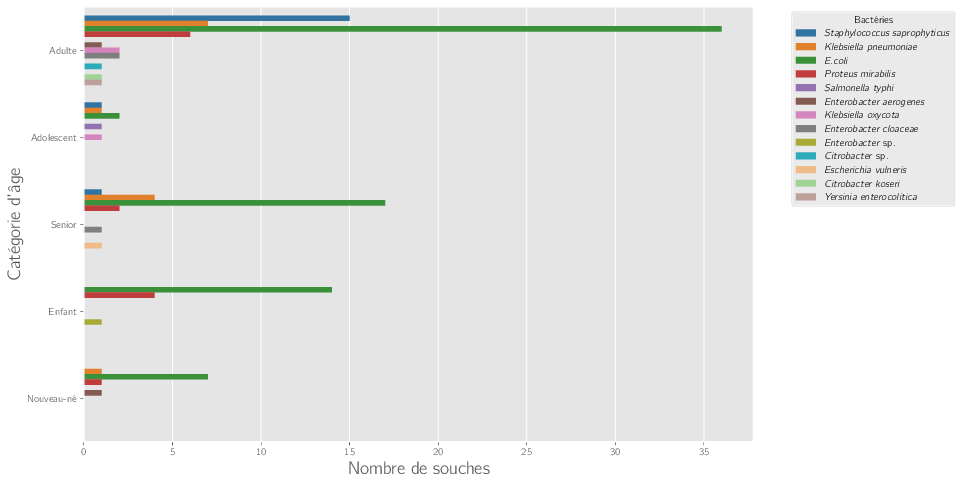

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib
import matplotlib as mpl
# matplotlib.use('pgf')
plt.style.use('ggplot')

# set the pgf rcParams
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage{cmbright}",
    ],
})

# Load the dataset
file_path = 'The_newest_datafinal.csv'  # Replace with your file path
data = pd.read_csv(file_path,encoding='latin1')
data = data[data['gender'].isin(['Homme', 'Femme'])]
# Creating the results directory if it doesn't exist
results_dir = 'results'  # Adjust this path as necessary


# Define age categories
age_categories = {
    'Nouveau-né': (0, 1),
    'Enfant': (2, 12),
    'Adolescent': (13, 19),
    'Adulte': (20, 64),
    'Senior': (65, data['age'].max())
}

# Function to categorize age
def categorize_age(age):
    for category, (min_age, max_age) in age_categories.items():
        if min_age <= age <= max_age:
            return category
    return 'Unknown'

# Apply the categorization
data['age_category'] = data['age'].apply(categorize_age)

# Setting the style for the plots
plt.style.use('ggplot')
# Custom color palette
custom_palette = sns.color_palette("tab10", n_colors=13)
custom_colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Yellow-green
    '#17becf',  # Teal
    '#ffbb78',  # Light orange
    '#98df8a',  # Light green
    '#c49c94'   # Beige
]
# Creating the plot for species distribution across age categories
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='age_category', hue='Species', data=data,palette=custom_colors)
# plt.title('Répartition des espèces par catégories d\'âge', fontsize=15)
plt.xlabel('Nombre de souches', fontsize=18)
plt.ylabel('Catégorie d\'âge', fontsize=18)
# plt.legend(title='Catégorie d\'âge', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

yticklabels = [ 
 r'\textit{Staphylococcus saprophyticus}',                     
r'\textit{Klebsiella pneumoniae}',  
r' \textit{E.coli}',   
r'\textit{Proteus mirabilis}' ,
r'\textit{Salmonella typhi}'  ,
r'\textit{Enterobacter aerogenes}' , 
r'\textit{Klebsiella oxycota}' ,          
r'\textit{Enterobacter cloaceae}' ,       
r'\textit{Enterobacter} sp.' ,         
r'\textit{Citrobacter} sp.'  ,           
r'\textit{Escherichia vulneris}' ,    
r'\textit{Citrobacter koseri}' ,          
r'\textit{Yersinia enterocolitica}']  
plt.legend(title='Bactéries', labels=yticklabels, bbox_to_anchor=(1.05, 1), loc='upper left')

# Saving the plot
results_dir = 'ResultsSarra'

species_age_distribution_plot = os.path.join(results_dir, '1.1-Species_Age_Distribution.pdf')
plt.savefig(species_age_distribution_plot, bbox_inches='tight',format='pdf')


In [53]:
data.groupby(['age_category'])[['Species']].count()

,Species
age_category,
Adolescent,6
Adulte,72
Enfant,19
Nouveau-né,10
Senior,26


In [ ]:
data[['Species','age_category']].value_counts()


,Unnamed: 0,strain,Species,age,gender,lactams,Aminoglycosides,Quinolones,Phenicols,Sulfonamides,Nitrofurans,Cyclines,Acide fusidique,Fosfomycine,Polymyxins,Macrolides et apparentes,Glycopeptides,Rifampicines,multi_resistance,age_category
0,116,302,Staphylococcus saprophiticus,42,Femme,1,0,0,0,0,NaN,0.0,0.0,1.0,NaN,1.0,0.0,0.0,1,Adulte
1,117,330,Staphylococcus saprophiticus,18,Femme,0,0,0,0,0,NaN,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0,Adolescent
2,118,383M,Staphylococcus saprophiticus,33,Femme,1,0,0,0,0,NaN,0.0,1.0,1.0,NaN,1.0,0.0,0.0,1,Adulte
3,119,425,Staphylococcus saprophiticus,51,Femme,1,0,0,0,0,NaN,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0,Adulte
4,120,462,Staphylococcus saprophiticus,23,Femme,1,0,0,0,0,NaN,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0,Adulte


## 3. Répartition des espèces bactériennes par sexe

Cette section explore la répartition des **espèces bactériennes** en fonction du **sexe** des patients. Un graphique à barres a été utilisé pour visualiser la **distribution des souches par sexe**, où les barres représentant chaque **espèce** sont séparées selon le sexe (Homme ou Femme).

### Création du graphique

Le graphique produit est un **compte des souches** pour chaque **espèce bactérienne** en fonction du **sexe**, permettant ainsi d'identifier s'il existe des différences notables entre les sexes pour chaque espèce. Les **espèces bactériennes** étudiées sont listées sur l'axe des ordonnées, et le nombre de souches est représenté sur l'axe des abscisses.

Les espèces considérées comprennent :
- *Staphylococcus saprophyticus*, *Klebsiella pneumoniae*, *E.coli*, etc.

Le graphique a été sauvegardé sous forme de fichier PDF dans le répertoire `ResultsSarra`.


/Users/mac/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


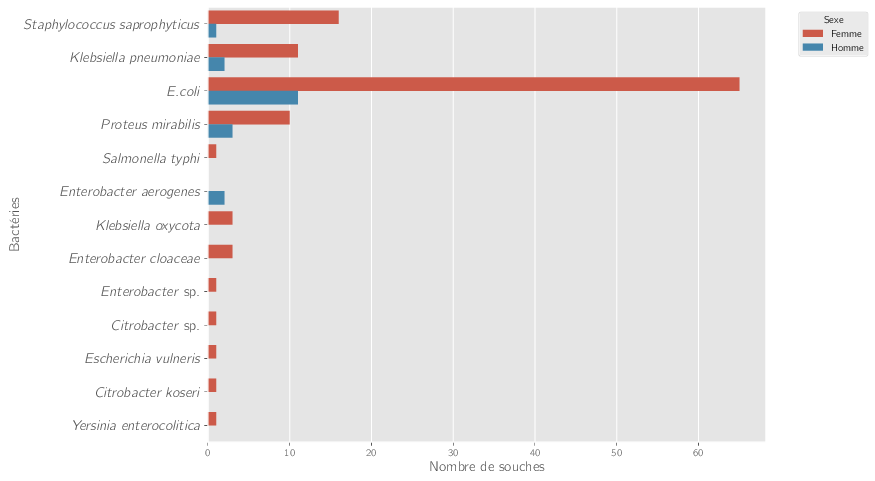

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import matplotlib as mpl
import seaborn as sns
matplotlib.use('pgf')
pdflatex_path = r'/Library/TeX/texbin/pdflatex'
# set the pgf rcParams
# set the pgf rcParams
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})

# Load the dataset
file_path = 'The_newest_datafinal.csv'  # Replace with your file path
data = pd.read_csv(file_path,encoding='latin1',index_col=0)
data = data[data['gender'].isin(['Homme', 'Femme'])]
# Creating the results directory if it doesn't exist
results_dir = 'results'  # Adjust this path as necessary


# Setting the style for the plots
plt.style.use('ggplot')


# Creating the plot for species distribution by gender
plt.figure(figsize=(10, 8))

ax = sns.countplot(y='Species', hue='gender', data=data)
# plt.title('Répartition des espèces par sex', fontsize=15)
plt.xlabel('Nombre de souches', fontsize=14)
plt.ylabel('Bactéries', fontsize=14)
plt.legend(title='Sexe', bbox_to_anchor=(1.05, 1), loc='upper left')


yticklabels = [ 
 r'\textit{Staphylococcus saprophyticus}' , 
                   
r'\textit{Klebsiella pneumoniae}',  
r' \textit{E.coli}',   
r'\textit{Proteus mirabilis}' ,
r'\textit{Salmonella typhi}'  ,
r'\textit{Enterobacter aerogenes}' , 
r'\textit{Klebsiella oxycota}' ,
r'\textit{Enterobacter cloaceae}' ,       
r'\textit{Enterobacter} sp.' ,         
r'\textit{Citrobacter} sp.'  ,           
r'\textit{Escherichia vulneris}' ,    
r'\textit{Citrobacter koseri}' ,          
r'\textit{Yersinia enterocolitica}',
  
]  
ax.set_yticklabels(yticklabels, fontsize=14)
# Saving the plot
results_dir = 'ResultsSarra'
# \textit{Staphylococcus} à  coagulase négative
species_gender_distribution_plot = os.path.join(results_dir, '2-Species_Gender_Distribution.pdf')
plt.savefig(species_gender_distribution_plot, bbox_inches='tight',format='pdf')


In [7]:
strain_counts = data.groupby(['gender', 'Species']).size().reset_index(name='strain_count')

strain_counts

,gender,Species,strain_count
0,Femme,Citrobacter koseri,1
1,Femme,Citrobacter spp.,1
2,Femme,E.coli,65
3,Femme,Enterobacter cloaceae,3
4,Femme,Enterobacter spp.,1
5,Femme,Escherichia vulneris,1
6,Femme,Klebsiella oxycota,3
7,Femme,Proteus mirabilis,10
8,Femme,Salmonella typhi,1
9,Femme,Staphylococcus saprophiticus,16


# 4.  Analyse de la multirésistance en fonction du sexe et de l'âge

Dans cette sous-section, nous explorons la répartition des souches en fonction de la multirésistance, en analysant spécifiquement la relation entre le sexe et la catégorie d'âge des individus. Nous utilisons les données du fichier The_newest_datafinal.csv, après avoir appliqué des filtres pour ne conserver que les genres « Homme » et « Femme », ainsi qu'une catégorisation des tranches d'âge. La multirésistance est exprimée par deux catégories : « BMR(-) » (absence de multirésistance) et « BMR(+) » (présence de multirésistance). Nous générons deux visualisations principales : la première montre la distribution de la multirésistance par sexe, et la seconde analyse cette même distribution par catégorie d'âge. Les résultats sont sauvegardés sous forme de fichiers PDF dans le répertoire spécifié.

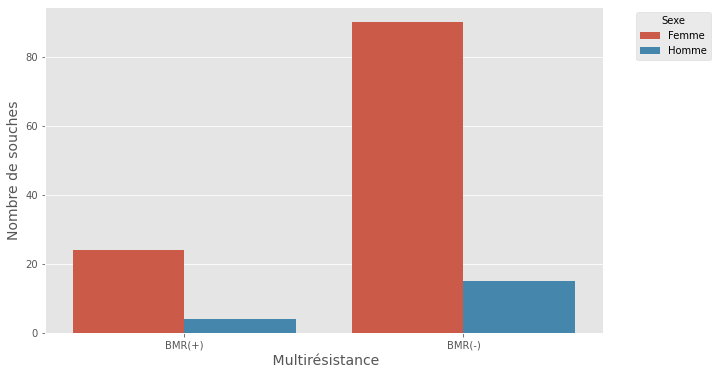

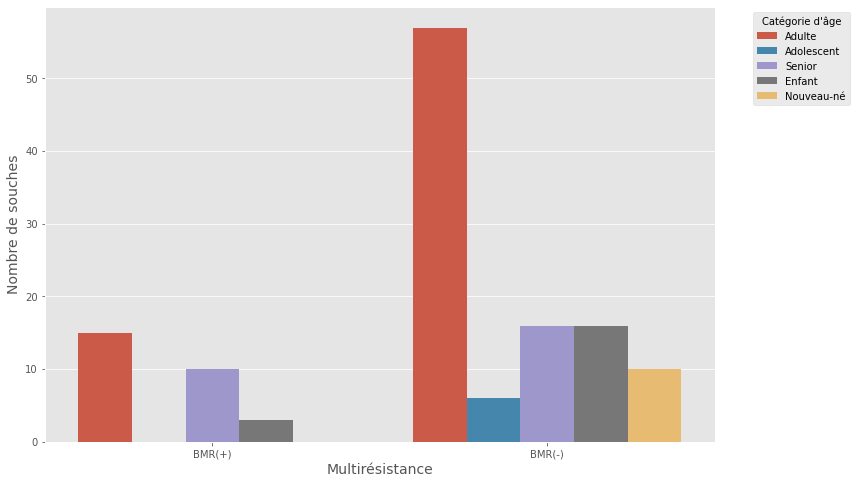

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
file_path = 'The_newest_datafinal.csv'  # Replace with your file path
data = pd.read_csv(file_path,encoding='latin1')
data = data[data['gender'].isin(['Homme', 'Femme'])]
# Creating the results directory if it doesn't exist
results_dir = 'results'  # Adjust this path as necessary


# Define age categories
age_categories = {
    'Nouveau-né': (0, 1),
    'Enfant': (2, 12),
    'Adolescent': (13, 19),
    'Adulte': (20, 64),
    'Senior': (65, data['age'].max())
}

# Function to categorize age
def categorize_age(age):
    for category, (min_age, max_age) in age_categories.items():
        if min_age <= age <= max_age:
            return category
    return 'Unknown'

# Apply the categorization
data['age_category'] = data['age'].apply(categorize_age)

# Filter data for only 'Male' and 'Female' genders
data = data[data['gender'].isin(['Homme', 'Femme'])]

# Map multi_resistance values from 0 and 1 to 'Non' and 'Oui'
data['multi_resistance_mapped'] = data['multi_resistance'].map({0: 'BMR(-)', 1: 'BMR(+)'})


# Setting the style for the plots
plt.style.use('ggplot')


# Updated Plot 1: Multi-Resistance by Gender with 'Oui' and 'Non'
plt.figure(figsize=(10, 6))
sns.countplot(x='multi_resistance_mapped', hue='gender', data=data)
# plt.title('Résistance multiple par sex', fontsize=15)
plt.xlabel(' Multirésistance', fontsize=14)
plt.ylabel('Nombre de souches', fontsize=14)
plt.legend(title='Sexe', bbox_to_anchor=(1.05, 1), loc='upper left')
results_dir = 'ResultsSarra'
updated_multi_resistance_gender_plot = os.path.join(results_dir, '3.1-Updated_Multi_Resistance_Gender.pdf')
plt.savefig(updated_multi_resistance_gender_plot, bbox_inches='tight',format='pdf')

# Updated Plot 2: Multi-Resistance by Age Intervals with 'Oui' and 'Non'
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')

sns.countplot(x='multi_resistance_mapped', hue='age_category', data=data)
# plt.title('Résistance multiple par catégorie d\'âge', fontsize=15)
plt.xlabel('Multirésistance', fontsize=14)
plt.ylabel('Nombre de souches', fontsize=14)
plt.legend(title='Catégorie d\'âge', bbox_to_anchor=(1.05, 1), loc='upper left')
updated_multi_resistance_age_plot = os.path.join(results_dir, '3-Multi_Resistance_Age.pdf')
plt.savefig(updated_multi_resistance_age_plot, bbox_inches='tight',format='pdf')


## 5. Répartition de la résistance multiple par espèce bactérienne

Cette section a pour objectif d'analyser la **répartition de la résistance multiple** parmi les différentes **espèces bactériennes** présentes dans notre jeu de données. La **multirésistance** a été catégorisée en deux groupes : **Non-BMR** (absence de résistance multiple) et **BMR** (présence de résistance multiple).

Un graphique à barres a été généré pour visualiser le **nombre de souches par espèce**, distinguées selon la présence ou l'absence de multirésistance. Cette analyse permet d'identifier les espèces bactériennes les plus résistantes et celles présentant une résistance minimale, offrant ainsi une vue d'ensemble de la **répartition de la résistance** parmi les différentes espèces.


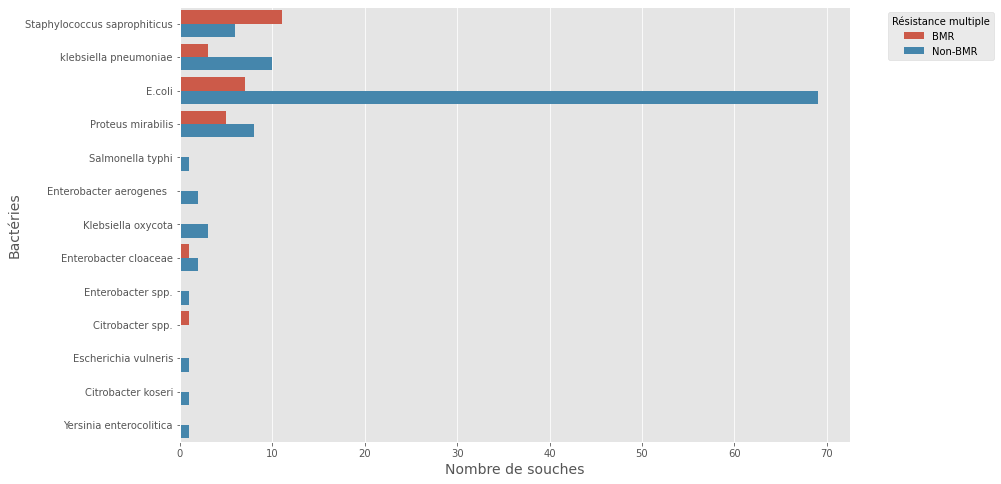

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import matplotlib as mpl
import seaborn as sns
# matplotlib.use('pgf')

# # set the pgf rcParams
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     "pgf.preamble": [
#          r"\usepackage[utf8x]{inputenc}",
#          r"\usepackage[T1]{fontenc}",
#          r"\usepackage{cmbright}",
#          ]
# })

# Load the dataset
file_path = 'The_newest_datafinal.csv'
data = pd.read_csv(file_path,encoding='latin1')

# Map multi_resistance values from 0 and 1 to 'Non' and 'Oui'
data['multi_resistance_mapped'] = data['multi_resistance'].map({0: 'Non-BMR', 1: 'BMR'})

# Setting the style for the plots
plt.style.use('ggplot')


# Creating the plot for multi-resistance distribution across species
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='Species', hue='multi_resistance_mapped', data=data)
# plt.title('Répartition de la résistance multiple par espèce', fontsize=15)
plt.xlabel('Nombre de souches', fontsize=14)
plt.ylabel('Bactéries', fontsize=14)
plt.legend(title='Résistance multiple', bbox_to_anchor=(1.05, 1), loc='upper left')

# yticklabels = [                      
# r'\textit{Klebsiella pneumoniae}',  
# r' \textit{E.coli}',   
# r'\textit{Proteus mirabilis}' ,
# r'\textit{Salmonella typhi}'  ,
# r'\textit{Enterobacter aerogenes}' , 
# r'\textit{Klebsiella oxycota}' ,          
# r'\textit{Enterobacter cloaceae}' ,       
# r'\textit{Enterobacter} spp.' ,         
# r'\textit{Citrobacter} spp.'  ,           
# r'\textit{Escherichia vulneris}' ,    
# r'\textit{Citrobacter koseri}' ,          
# r'\textit{Yersinia enterocolitica}',
# r'\textit{Staphylococcus saprophyticus}']  
# ax.set_yticklabels(yticklabels, fontsize=12)

# Save the plot in black and white
results_dir = 'ResultsSarra'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
bw_multi_resistance_species_plot = os.path.join(results_dir, '4-Multi_Resistance_Species.pdf')
plt.savefig(bw_multi_resistance_species_plot, bbox_inches='tight',format='pdf')


## 6. Répartition de la résistance antibiotique par groupe bactérien et catégorie d’âge

Dans cette section, nous explorons la répartition du **taux de résistance aux antibiotiques** par groupe bactérien et par **catégorie d’âge**. Les espèces ont été classées en deux groupes principaux : **Staphylococcus saprophyticus** et **Entérobactéries**. Les patients ont été répartis en cinq **catégories d'âge** : **Nouveau-né (0–1 an)**, **Enfant (2–12 ans)**, **Adolescent (13–19 ans)**, **Adulte (20–64 ans)** et **Senior (65 ans et plus)**.

Un graphique à barres empilées a été généré pour visualiser le **taux de résistance (%)** aux antibiotiques pour chaque groupe bactérien dans les différentes catégories d’âge. Ce graphique permet de comparer la résistance antibiotique entre **Staphylococcus saprophyticus** et les **Entérobactéries** à travers les catégories d'âge. Les résultats sont sauvegardés sous forme de fichier PDF et illustrent l’évolution du taux de résistance en fonction de l’âge pour chaque groupe bactérien.


In [12]:
# Load the dataset
file_path = 'The_newest_datafinal.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Define age categories in French
age_categories = {
    'Nouveau-né': (0, 1),
    'Enfant': (2, 12),
    'Adolescent': (13, 19),
    'Adulte': (20, 64),
    'Senior': (65, data['age'].max())
}

# Function to categorize age
def categorize_age(age):
    for category, (min_age, max_age) in age_categories.items():
        if min_age <= age <= max_age:
            return category
    return 'Inconnu'

# Apply the age categorization
data['catégorie_d\'âge'] = data['age'].apply(categorize_age)
data['catégorie_d\'âge'] = pd.Categorical(data['catégorie_d\'âge'], categories=['Nouveau-né', 'Enfant', 'Adolescent', 'Adulte', 'Senior'], ordered=True)
# Classify data into two groups: Staphylococcus saprophyticus and Entérobactéries
data['Groupe'] = data['Species'].apply(lambda x: 'Staphylococcus saprophyticus' if 'saprophiticus' in x.lower() else 'Entérobactéries')


Index(['lactams', 'Aminoglycosides', 'Quinolones', 'Phenicols', 'Sulfonamides',
       'Nitrofurans', 'Cyclines', 'Acide fusidique', 'Fosfomycine',
       'Polymyxins', 'Macrolides et apparentes', 'Glycopeptides',
       'Rifampicines'],
      dtype='object')


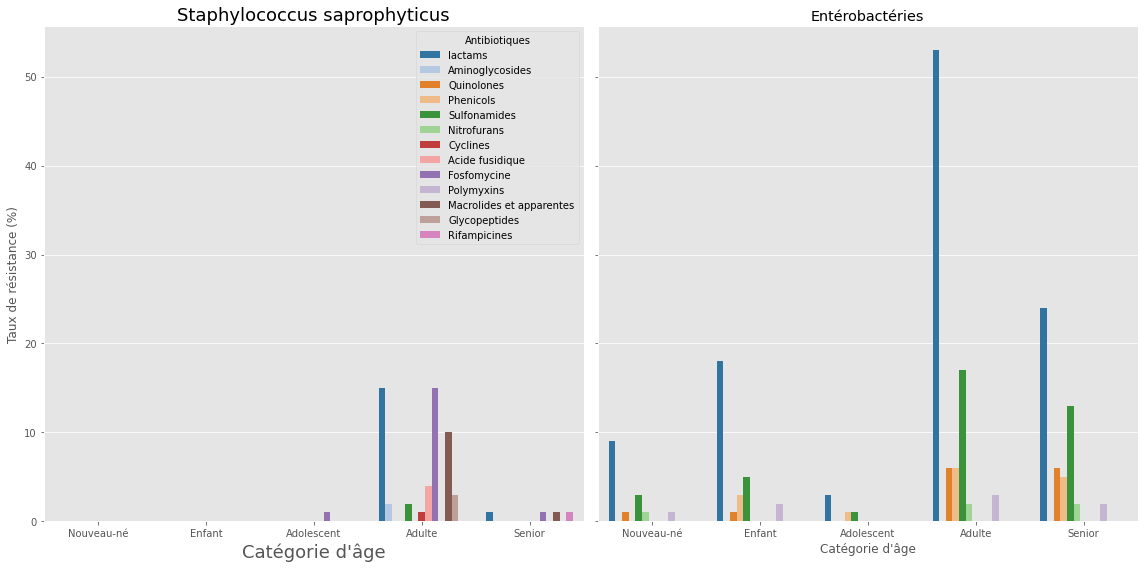

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Load the dataset
file_path = 'The_newest_datafinal.csv'
data = pd.read_csv(file_path, encoding='latin1', index_col=0)

# Define age categories in French
age_categories = {
    'Nouveau-né': (0, 1),
    'Enfant': (2, 12),
    'Adolescent': (13, 19),
    'Adulte': (20, 64),
    'Senior': (65, data['age'].max())
}

# Function to categorize age
def categorize_age(age):
    for category, (min_age, max_age) in age_categories.items():
        if min_age <= age <= max_age:
            return category
    return 'Inconnu'

# Apply the age categorization
data['catégorie_d\'âge'] = data['age'].apply(categorize_age)
data['catégorie_d\'âge'] = pd.Categorical(data['catégorie_d\'âge'], categories=['Nouveau-né', 'Enfant', 'Adolescent', 'Adulte', 'Senior'], ordered=True)

# Classify data into two groups: Staphylococcus saprophyticus and Entérobactéries
data['Groupe'] = data['Species'].apply(lambda x: 'Staphylococcus saprophyticus' if 'saprophiticus' in x.lower() else 'Entérobactéries')

# Extract antibiotic resistance categories and calculate mean as percentages
categories = data.columns[4:-3]  # Adjust based on dataset structure
grouped_data = data.groupby(['Groupe', 'catégorie_d\'âge'])[categories].sum()  # Convert to percentages
print(categories)
# Melt the grouped data into long format for Seaborn
long_data = (
    grouped_data.reset_index()
    .melt(id_vars=['Groupe', 'catégorie_d\'âge'], var_name='Antibiotiques', value_name='Taux de résistance (%)')
)

# Set up a larger color palette
colors = sns.color_palette("tab20", len(categories))  # Use an expanded color palette

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot for Staphylococcus saprophyticus
sns.barplot(
    data=long_data[long_data['Groupe'] == 'Staphylococcus saprophyticus'],
    x='catégorie_d\'âge',
    y='Taux de résistance (%)',
    hue='Antibiotiques',
    palette=colors,
    dodge=True,
    ax=axes[0],
)
axes[0].set_title("Staphylococcus saprophyticus",fontsize=18)
axes[0].set_xlabel("Catégorie d'âge",fontsize=18)
axes[0].set_ylabel("Taux de résistance (%)")

# Plot for Entérobactéries
sns.barplot(
    data=long_data[long_data['Groupe'] == 'Entérobactéries'],
    x='catégorie_d\'âge',
    y='Taux de résistance (%)',
    hue='Antibiotiques',
    palette=colors,
    dodge=True,
    ax=axes[1],
)
axes[1].set_title("Entérobactéries")
axes[1].set_xlabel("Catégorie d'âge")
axes[1].set_ylabel("")

axes[1].get_legend().remove()

# Tighten layout and show the plot
plt.tight_layout()
results_dir = 'ResultsSarra'
annotated_stacked_bar_gender_plot = os.path.join(results_dir, '5-Stacked_Bar_age_sns.pdf')
plt.savefig(annotated_stacked_bar_gender_plot, bbox_inches='tight')
plt.show()


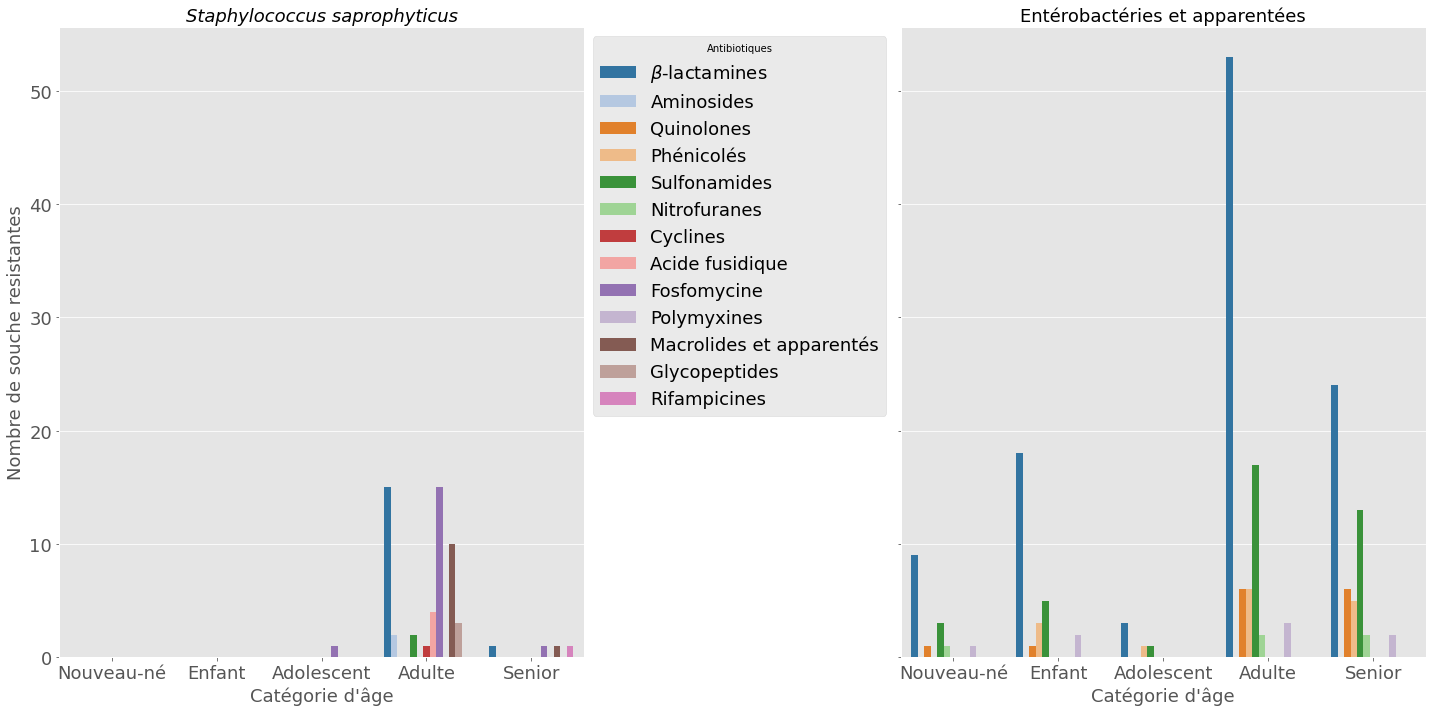

In [12]:
# Update Seaborn plots with legend customization
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Plot for Staphylococcus saprophyticus
sns.barplot(
    data=long_data[long_data['Groupe'] == 'Staphylococcus saprophyticus'],
    x='catégorie_d\'âge',
    y='Taux de résistance (%)',
    hue='Antibiotiques',
    palette=colors,
    dodge=True,
    ax=axes[0],
)
antibiotics_greek_legend = [
    r'$\beta$-lactamines', 'Aminosides', 'Quinolones', 'Phénicolés', 'Sulfonamides',
    'Nitrofuranes', 'Cyclines', r'Acide fusidique', 'Fosfomycine', 'Polymyxines',
    'Macrolides et apparentés', 'Glycopeptides', 'Rifampicines'
]
axes[0].set_title("Staphylococcus saprophyticus",fontstyle='italic',fontsize=18)
axes[0].set_xlabel("Catégorie d'âge",fontsize=18)
axes[0].set_ylabel("Nombre de souche resistantes",fontsize=18)
axes[0].tick_params(axis='both', labelsize=18)

# Update legend for the first plot
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(
    handles=handles,
    labels=antibiotics_greek_legend,  # Use the updated labels
    title='Antibiotiques',
    bbox_to_anchor=(1, 1),
    loc='upper left',
    fontsize=18
)

# Plot for Entérobactéries without a legend
sns.barplot(
    data=long_data[long_data['Groupe'] == 'Entérobactéries'],
    x='catégorie_d\'âge',
    y='Taux de résistance (%)',
    hue='Antibiotiques',
    palette=colors,
    dodge=True,
    ax=axes[1],
)
axes[1].set_title("Entérobactéries et apparentées",fontsize=18)
axes[1].set_xlabel("Catégorie d'âge",fontsize=18)
axes[1].set_ylabel("",fontsize=18)
axes[1].tick_params(axis='both', labelsize=18)
axes[1].legend_.remove()  # Remove the legend from the second plot

# Adjust layout and save
plt.tight_layout()
results_dir = 'ResultsSarra'
annotated_stacked_bar_gender_plot = os.path.join(results_dir, '5-Stacked_Bar_age_sns1.pdf')
plt.savefig(annotated_stacked_bar_gender_plot, bbox_inches='tight')
plt.show()


                         Groupe catégorie_d'âge Antibiotiques  \
5  Staphylococcus saprophyticus      Nouveau-né       lactams   
6  Staphylococcus saprophyticus          Enfant       lactams   
7  Staphylococcus saprophyticus      Adolescent       lactams   
8  Staphylococcus saprophyticus          Adulte       lactams   
9  Staphylococcus saprophyticus          Senior       lactams   

   Taux de résistance (%)  
5                     0.0  
6                     0.0  
7                     0.0  
8                    15.0  
9                     1.0  


[<BarContainer object of 11 artists>, <BarContainer object of 11 artists>, <BarContainer object of 11 artists>, <BarContainer object of 11 artists>, <BarContainer object of 11 artists>]


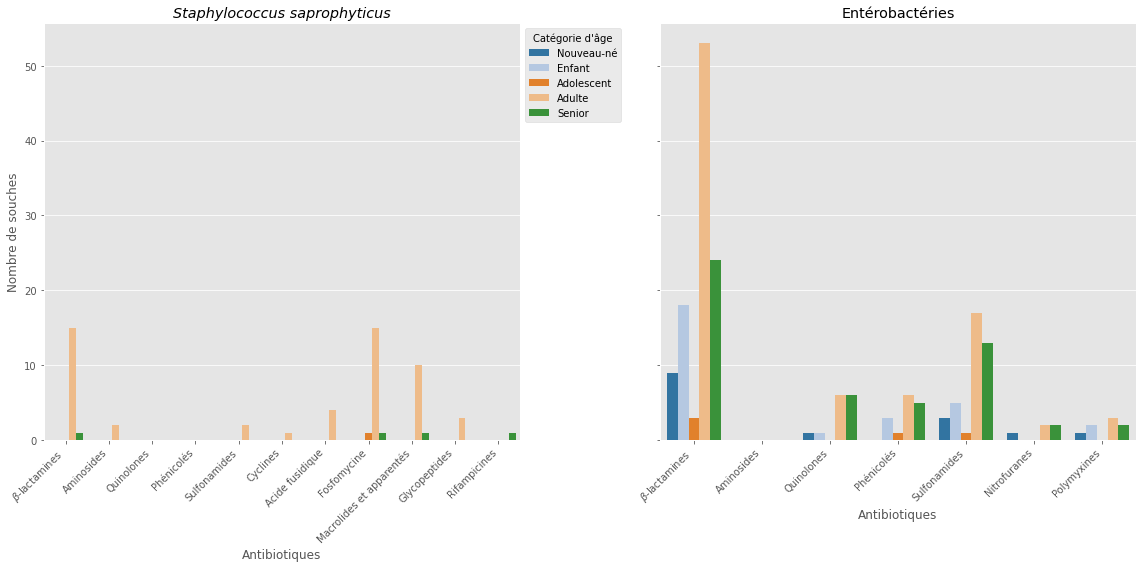

In [9]:
# Update Seaborn plots with legend customization
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot for Staphylococcus saprophyticus
d=long_data[long_data['Groupe'] == 'Staphylococcus saprophyticus']
d = d[~d['Antibiotiques'].isin(['Nitrofurans', 'Polymyxins'])]

print(d.head())
sns.barplot(
    data=d,
    x='Antibiotiques',
    y='Taux de résistance (%)',
    hue='catégorie_d\'âge',
    palette=colors,
    dodge=True,
    ax=axes[0],
)
antibiotics_greek_legend = [
    r'$\beta$-lactamines', 'Aminosides', 'Quinolones', 'Phénicolés', 'Sulfonamides',
     'Cyclines', r'Acide fusidique', 'Fosfomycine', 
    'Macrolides et apparentés', 'Glycopeptides', 'Rifampicines'
]

axes[0].set_title("Staphylococcus saprophyticus", fontstyle='italic')
axes[0].set_xlabel("Antibiotiques")
axes[0].set_ylabel("Nombre de souches")
# Rotate x-axis labels by 45 degrees for the first plot
axes[0].set_xticklabels(antibiotics_greek_legend, rotation=45, ha="right")
# Update legend for the first plot
handles, labels = axes[0].get_legend_handles_labels()
print(handles)
axes[0].legend(
    handles=handles,
    title="Catégorie d'âge",
    bbox_to_anchor=(1, 1),
    loc='upper left',
)
d=long_data[long_data['Groupe'] == 'Entérobactéries']
d = d[~d['Antibiotiques'].isin(['Cyclines',	'Acide fusidique',	'Fosfomycine', 'Macrolides et apparentes',	'Glycopeptides',	'Rifampicines'])]

# Plot for Entérobactéries without a legend
sns.barplot(
    data=d,
    x='Antibiotiques',
    y='Taux de résistance (%)',
    hue='catégorie_d\'âge',
    palette=colors,
    dodge=True,
    ax=axes[1],
)
axes[1].set_title("Entérobactéries")
axes[1].set_xlabel("Antibiotiques")
axes[1].set_ylabel("")
axes[1].legend_.remove()  # Remove the legend from the second plot
# Rotate x-axis labels by 45 degrees for the first plot
antibiotics_greek_legend = [
    r'$\beta$-lactamines', 'Aminosides', 'Quinolones', 'Phénicolés', 'Sulfonamides',
    'Nitrofuranes',  'Polymyxines'
]
axes[1].set_xticklabels(antibiotics_greek_legend, rotation=45, ha="right")
# Adjust layout and save
plt.tight_layout()
results_dir = 'ResultsSarra'
annotated_stacked_bar_gender_plot = os.path.join(results_dir, '5-Stacked_Bar_age_sns3.pdf')
plt.savefig(annotated_stacked_bar_gender_plot, bbox_inches='tight')
plt.show()


In [72]:
file_path = 'The_newest_datafinal.csv'
data = pd.read_csv(file_path,encoding='latin1')

# Define age categories in French
age_categories = {
    'Nouveau-né': (0, 1),
    'Enfant': (2, 12),
    'Adolescent': (13, 19),
    'Adulte': (20, 64),
    'Senior': (65, data['age'].max())
}

# Function to categorize age
def categorize_age(age):
    for category, (min_age, max_age) in age_categories.items():
        if min_age <= age <= max_age:
            return category
    return 'Inconnu'

data['catégorie_d\'âge'] = data['age'].apply(categorize_age)
data[['Species', 'catégorie_d\'âge' , 'lactams',
       'Aminoglycosides', 'Quinolones', 'Phenicols', 'Sulfonamides',
       'Nitrofurans', 'Polymyxins']]

,Species,catégorie_d'âge,lactams,Aminoglycosides,Quinolones,Phenicols,Sulfonamides,Nitrofurans,Polymyxins
0,klebsiella pneumoniae,Adulte,1,0,1,0,0,0,0
1,E.coli,Senior,1,0,1,1,0,0,0
2,E.coli,Adulte,1,0,0,0,1,0,0
3,Proteus mirabilis,Enfant,1,0,0,0,0,0,0
4,Salmonella typhi,Adolescent,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
128,Staphylococcus saprophiticus,Adulte,0,0,0,0,0,0,0
129,Staphylococcus saprophiticus,Adulte,0,0,0,0,0,0,0
130,Staphylococcus saprophiticus,Adulte,0,0,0,0,0,0,0
131,Staphylococcus saprophiticus,Adulte,0,0,0,0,0,0,0


## 7. Analyse de la résistance antibiotique en fonction du sexe et du groupe bactérien

Cette section présente une analyse graphique de la résistance antibiotique en fonction du sexe des patients et du groupe bactérien. Deux groupes principaux sont examinés : **Staphylococcus saprophyticus** et **Entérobactéries**. Les taux de résistance sont représentés sous forme de graphiques à barres empilées, chaque barre représentant le nombre de souches résistantes à différents antibiotiques pour chaque sexe dans chaque groupe bactérien.

Les étapes suivantes ont été réalisées :
- **Classification des données** : Le groupe bactérien a été attribué à chaque échantillon en fonction de la présence du terme "saprophiticus" dans le nom de l'espèce.
- **Calcul des résistances** : Les données de résistance ont été agrégées par groupe bactérien et par sexe.
- **Visualisation** : Un graphique à barres empilées a été généré pour chaque groupe bactérien, permettant de visualiser la résistance aux antibiotiques.


Index(['gender', 'lactams', 'Aminoglycosides', 'Quinolones', 'Phenicols',
       'Sulfonamides', 'Nitrofurans', 'Cyclines', 'Acide fusidique',
       'Fosfomycine', 'Polymyxins', 'Macrolides et apparentes',
       'Glycopeptides', 'Rifampicines'],
      dtype='object')


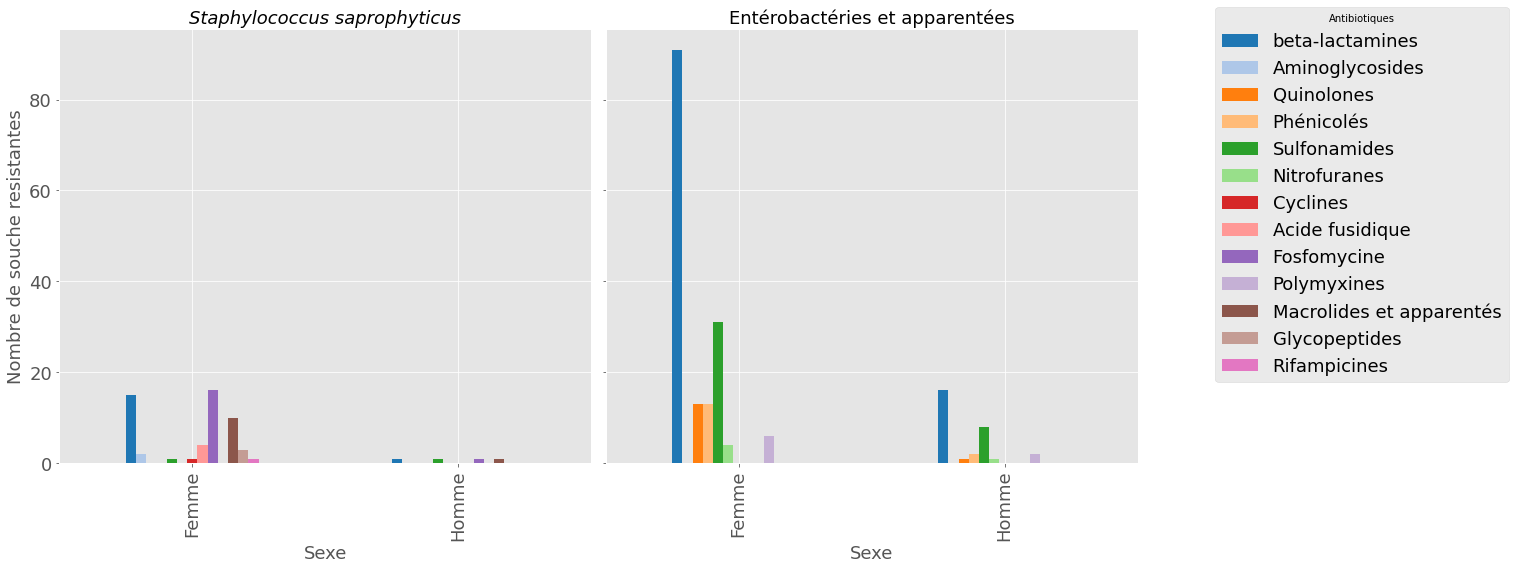

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
# Load and prepare the dataset
file_path = 'The_newest_datafinal.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Classify data into two groups: Staphylococcus saprophyticus and Enterobacteriaceae
data['Groupe'] = data['Species'].apply(lambda x: 'Staphylococcus saprophyticus' if 'saprophiticus' in x.lower() else 'Entérobactéries')

# Extract antibiotic resistance categories
categories = data.columns[4:-2]  # Adjust based on dataset structure
print(categories)
# Convert resistance rates to percentages and group by gender and bacterial group
grouped_gender_data = data.groupby(['Groupe', 'gender'])[categories].sum() # Convert to percentages

# Set up the color palette for the plot
colors = sns.color_palette("tab20", len(categories))  # Use an expanded color palette for up to 20 colors

# Initialize subplots for the two groups
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot for Staphylococcus saprophyticus
grouped_gender_data.loc['Staphylococcus saprophyticus'].plot(kind='bar', stacked=False, ax=axes[0], color=colors)
axes[0].set_title("Staphylococcus saprophyticus",fontsize=18,fontstyle='italic')
axes[0].set_xlabel("Sexe",fontsize=18)
axes[0].set_ylabel("Nombre de souche resistantes",fontsize=18)
axes[0].tick_params(axis='both', labelsize=18)
# Plot for Enterobacteriaceae
grouped_gender_data.loc['Entérobactéries'].plot(kind='bar', stacked=False, ax=axes[1], color=colors)
axes[1].set_title("Entérobactéries et apparentées",fontsize=18)
axes[1].set_xlabel("Sexe",fontsize=18)
axes[1].tick_params(axis='both', labelsize=18)
# Remove individual legends from each subplot
axes[0].get_legend().remove()
axes[1].get_legend().remove()

# Set a single legend with Greek symbols for antibiotics
antibiotics_greek_legend = [
    r'beta-lactamines', 'Aminoglycosides', 'Quinolones', 'Phénicolés', 'Sulfonamides',
    'Nitrofuranes', 'Cyclines', r'Acide fusidique', 'Fosfomycine', 'Polymyxines',
    'Macrolides et apparentés', 'Glycopeptides', 'Rifampicines'
]
fig.legend(title='Antibiotiques', labels=antibiotics_greek_legend, bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=18)
# Annotate each bar with percentage values, applying alternating shifts for non-zero values

results_dir = 'ResultsSarra'
annotated_stacked_bar_gender_plot = os.path.join(results_dir, '6-Stacked_Bar_Gender.pdf')
plt.savefig(annotated_stacked_bar_gender_plot, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd 

df = pd.read_csv('activite.csv')
df.columns

Index(['Code germe', 'MSSAS', 'MSSC', 'MSS', 'AJ', 'PR9'], dtype='object')

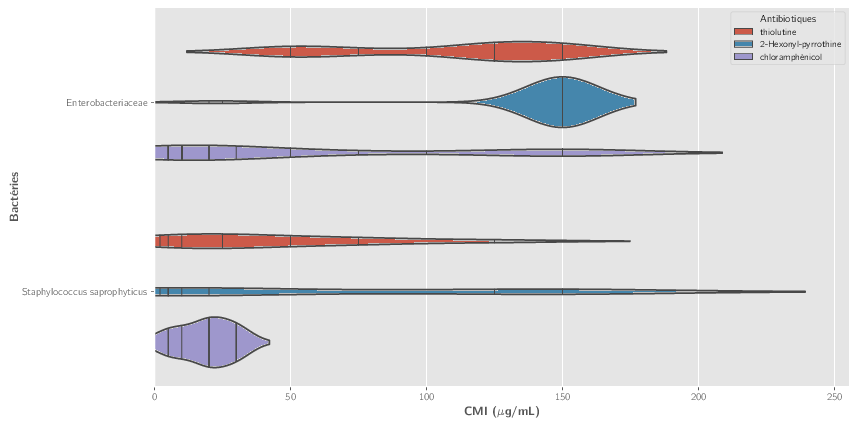

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Melt the data for visualization
melted_data = pd.melt(df, id_vars=['family', 'Species'], var_name='variable', value_name='value')

# Create the violin plot
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'Times New Roman'
violin_plot = sns.violinplot(
    x='value',  # Rotate by switching x and y
    y='family',  # Switch family to y-axis
    hue='variable',
    data=melted_data,
    inner='stick',
  
)




# Set labels and legend
plt.ylabel('Bactéries', fontweight='bold')  # Adjust label accordingly
plt.xlabel('CMI (µg/mL)', fontweight='bold')  # Adjust label accordingly
plt.xlim(left=0)  # Adjust limits for the x-axis


plt.legend(title='Antibiotiques', title_fontsize='10', fontsize='9')

# Show the plot
plt.tight_layout()

import os

results_dir = 'ResultsSarra'

os.makedirs(results_dir, exist_ok=True)
annotated_stacked_bar_gender_plot = os.path.join(results_dir, '10-CMI.pdf')
plt.savefig(annotated_stacked_bar_gender_plot, bbox_inches='tight')


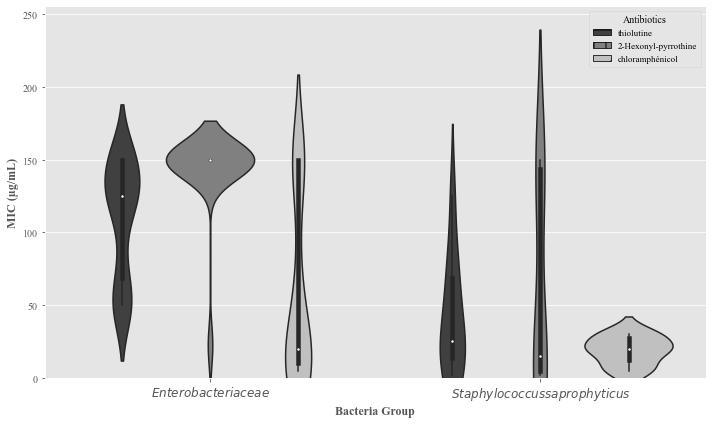

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# Melt the data for visualization
melted_data = pd.melt(df, id_vars=['family', 'Species'], var_name='variable', value_name='value')

# Create the violin plot
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'
violin_plot = sns.violinplot(
    x='family',
    y='value',
    hue='variable',
    data=melted_data,
    palette='gray'
)

# Customize the plot to make family names italic
violin_plot.set_xticklabels(
    [f"$\\it{{{label.get_text()}}}$" for label in violin_plot.get_xticklabels()],
    fontsize=12
)

# Set hatch patterns
hatch_patterns = ['-', '+', '/']
for i, patch in enumerate(violin_plot.patches):
    patch.set_hatch(hatch_patterns[i % len(hatch_patterns)])
    patch.set_edgecolor('black')

# Set labels and legend
plt.xlabel('Bacteria Group', fontweight='bold')
plt.ylabel('MIC (µg/mL)', fontweight='bold')
plt.ylim(bottom=0)
plt.legend(title='Antibiotics', title_fontsize='10', fontsize='9')

# Show the plot
plt.tight_layout()
plt.show()


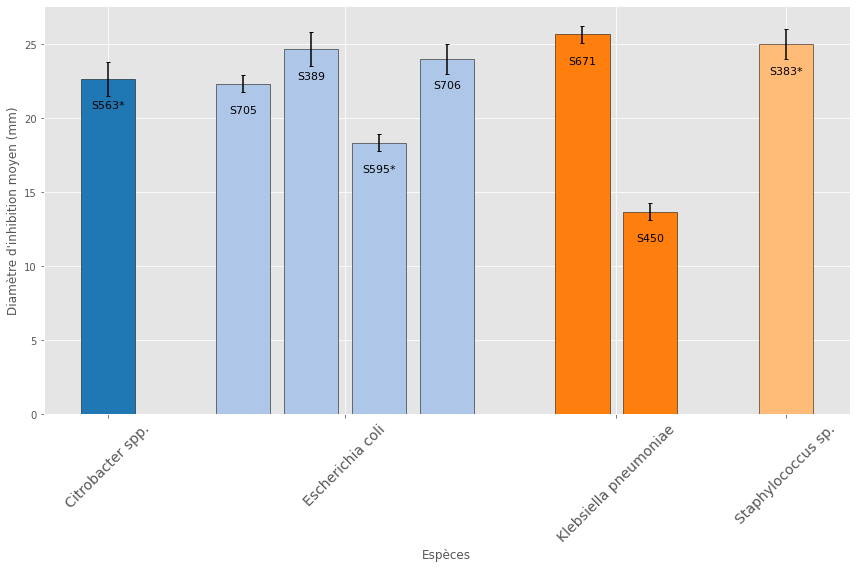

In [28]:
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Data setup
    data = {
        "Espèce": ["Citrobacter spp.", "Escherichia coli", "Escherichia coli", "Escherichia coli", "Escherichia coli", 
                "Klebsiella pneumoniae", "Klebsiella pneumoniae", "Staphylococcus sp."],
        "Souche": ["S563*", "S705", "S389", "S595*", "S706", "S671", "S450", "S383*"],
        "R1": [22, 22, 26, 18, 23, 26, 14, 24],
        "R2": [24, 22, 24, 19, 24, 25, 13, 25],
        "R3": [22, 23, 24, 18, 25, 26, 14, 26]
    }

    # Convert data to DataFrame
    df = pd.DataFrame(data)
    df["Mean"] = df[["R1", "R2", "R3"]].mean(axis=1)
    df["Std"] = df[["R1", "R2", "R3"]].std(axis=1)

    # Unique species and colors for grouping
    species = df["Espèce"].unique()
    cmap = plt.get_cmap("tab20")  # ggplot-like color map
    colors = [cmap(i) for i in range(len(species))]
    species_color_map = dict(zip(species, colors))
    bar_positions = []
    current_position = 0

    # Set up figure
    plt.figure(figsize=(12, 8))

    # Plotting each species group
    for specie in species:
        # Filter data for the current species
        specie_df = df[df["Espèce"] == specie]
        positions = np.arange(current_position, current_position + len(specie_df))
        bar_positions.append(positions.mean())
        bars = plt.bar(
            positions, 
            specie_df["Mean"], 
            yerr=specie_df["Std"], 
            capsize=2, 
            color=species_color_map[specie], 
            edgecolor="black", 
            label=specie
        )
        
        # Add strain labels and asterisks for multiresistant strains
        for bar, souche in zip(bars, specie_df["Souche"]):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, souche, ha="center", fontsize=11, color="black")

        current_position += len(specie_df) + 1  # Leave space between groups

    # Setting x-ticks and labels
    plt.xticks(np.hstack(bar_positions), species, fontsize=14, rotation=45)
    plt.xlabel("Espèces")
    plt.ylabel("Diamètre d'inhibition moyen (mm)")


    # Save as PDF
    plt.tight_layout()
    plt.savefig("ResultsSarra/8-inhibition_diameters.pdf")
    plt.show()


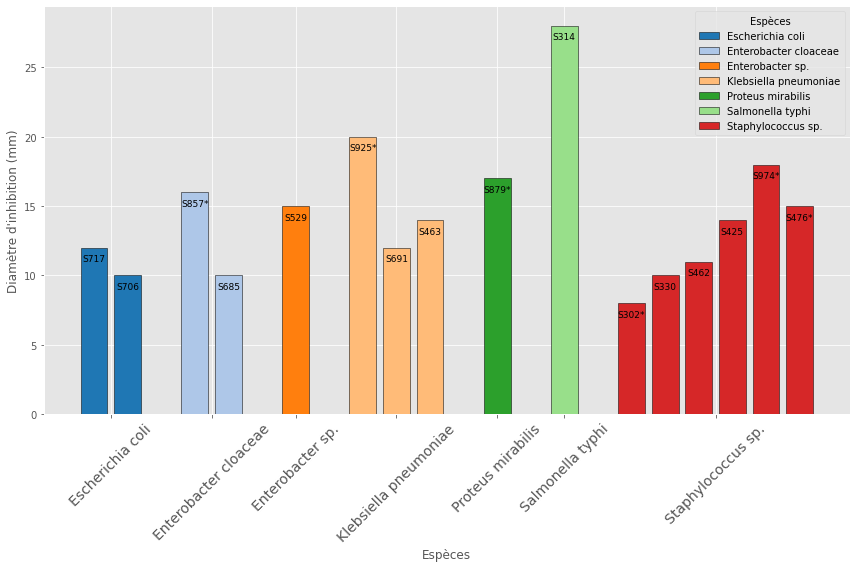

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Updated data
data = {
    "Espèce": [
        "Escherichia coli", "Escherichia coli", 
        "Enterobacter cloaceae", "Enterobacter cloaceae", 
        "Enterobacter sp.", 
        "Klebsiella pneumoniae", "Klebsiella pneumoniae", "Klebsiella pneumoniae", 
        "Proteus mirabilis", 
        "Salmonella typhi", 
        "Staphylococcus sp.", "Staphylococcus sp.", "Staphylococcus sp.", 
        "Staphylococcus sp.", "Staphylococcus sp.", "Staphylococcus sp."
    ],
    "Souche": ["S717", "S706", "S857*", "S685", "S529", "S925*", "S691", "S463", "S879*", "S314", "S302*", "S330", "S462", "S425", "S974*", "S476*"],
    "Inhibition": [12, 10, 16, 10, 15, 20, 12, 14, 17, 28, 8, 10, 11, 14, 18, 15]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Unique species and colors for grouping
species = df["Espèce"].unique()
cmap = plt.get_cmap("tab20")  # ggplot-like color map
colors = [cmap(i) for i in range(len(species))]
species_color_map = dict(zip(species, colors))
bar_positions = []
current_position = 0

# Set up figure
plt.figure(figsize=(12, 8))

# Plotting each species group
for specie in species:
    # Filter data for the current species
    specie_df = df[df["Espèce"] == specie]
    positions = np.arange(current_position, current_position + len(specie_df))
    bar_positions.append(positions.mean())
    bars = plt.bar(
        positions, 
        specie_df["Inhibition"], 
        color=species_color_map[specie], 
        edgecolor="black", 
        label=specie
    )
    
    # Add strain labels and asterisks for multiresistant strains
    for bar, souche in zip(bars, specie_df["Souche"]):
        color = "black"
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1, souche, ha="center", fontsize=9, color=color)

    current_position += len(specie_df) + 1  # Leave space between groups

# Setting x-ticks and labels
plt.xticks(np.hstack(bar_positions), species, fontsize=14, rotation=45)
plt.xlabel("Espèces")
plt.ylabel("Diamètre d'inhibition (mm)")
plt.legend(title="Espèces", loc="upper right")

# Save as PDF
plt.tight_layout()
plt.savefig("ResultsSarra/9-inhibition_diameters.pdf")
plt.show()


# 🎯 Analyse statistique

L’objectif de cette analyse est d’explorer les relations potentielles entre plusieurs variables issues des jeux de données `entro` et `staf`. Ces données contiennent des informations essentielles telles que l’âge, le genre, l’espèce bactérienne, ainsi que la résistance aux principales classes d’antibiotiques.

## 🧩 Étapes préliminaires

Avant de procéder aux tests statistiques, une phase d’exploration et de préparation des données a été menée :

- **Chargement et inspection des données** : Les jeux de données `entro` et `staf` ont été chargés pour identifier la structure et les variables disponibles (âge, genre, espèce, résistance aux antibiotiques).
- **Vérification des variables nécessaires** : Nous avons confirmé que les deux jeux de données contiennent toutes les variables requises pour les analyses prévues.

## 🗂️ Catégorisation de l’âge

Afin de faciliter les comparaisons statistiques, l’âge a été transformé en une variable catégorielle selon les tranches suivantes :

- `Nouveau-né` : 0–1 an  
- `Enfant` : 2–12 ans  
- `Adolescent` : 13–17 ans  
- `Adulte` : 18–64 ans  
- `Senior` : 65 ans et plus

Cette étape a été appliquée avec succès aux deux jeux de données.

---

## 🧪 Préparation des tests statistiques

Pour répondre aux différentes hypothèses posées, des tests statistiques adaptés à la nature des données ont été sélectionnés. Les choix méthodologiques se basent sur les types de variables (qualitatives ou quantitatives) ainsi que sur la taille des échantillons :

- **Test du Chi² d’indépendance** : Pour tester l’association entre deux variables qualitatives.
- **Test exact de Fisher** : Utilisé en cas de petits effectifs pour deux variables catégorielles.
- **ANOVA ou test de Kruskal-Wallis** : Pour comparer une variable quantitative entre plusieurs groupes (si applicable).

---

## 📊 Hypothèses testées

L’analyse portera sur les associations suivantes :

1. **Espèce bactérienne et genre**  
2. **Espèce bactérienne et catégorie d’âge**  
3. **Catégorie d’âge et résistance aux antibiotiques**  
4. **Genre et résistance aux antibiotiques**  
5. **Espèce bactérienne et résistance aux antibiotiques**  
6. **Multi-résistance et genre**  
7. **Multi-résistance et catégorie d’âge**  
8. **Multi-résistance et espèce bactérienne**  
9. **Multi-résistance et résistance aux différentes classes d’antibiotiques**

---

Chaque hypothèse sera analysée de manière rigoureuse, avec justification du test statistique utilisé, présentation des résultats et interprétation selon une démarche scientifique.


In [ ]:
import pandas as pd

# Load the uploaded files
file_path_entro = '/mnt/data/entro.xlsx'
file_path_staf = '/mnt/data/staf.xlsx'

# Loading the Excel files
entro_data = pd.read_excel(file_path_entro)
staf_data = pd.read_excel(file_path_staf)

# Display the first few rows of each dataset to understand their structure
entro_data.head(), staf_data.head()

# Define age categories
age_bins = [0, 1, 12, 19, 64, max(entro_data['age'].max(), staf_data['age'].max())]
age_labels = ['Nouveau-né', 'Enfant', 'Adolescent', 'Adulte', 'Senior']

# Categorize 'age' in both datasets
entro_data['age_category'] = pd.cut(entro_data['age'], bins=age_bins, labels=age_labels, right=False)
staf_data['age_category'] = pd.cut(staf_data['age'], bins=age_bins, labels=age_labels, right=False)

# Display the updated data to verify age categorization
entro_data[['age', 'age_category']].head(), staf_data[['age', 'age_category']].head()


## 🔬 Test 1 : Association entre l’espèce bactérienne et le genre

**Test utilisé :** Test du Chi² d’indépendance

### Objectif
Vérifier s’il existe une dépendance statistique entre l’espèce bactérienne identifiée et le genre du patient.

### Justification du test
Les deux variables sont qualitatives. Le test du Chi² est donc approprié pour mesurer l’association entre deux variables catégorielles indépendantes.

### Hypothèses
- **H₀ (hypothèse nulle)** : Il n’existe aucune association entre l’espèce bactérienne et le genre.
- **H₁ (hypothèse alternative)** : Il existe une association entre l’espèce bactérienne et le genre.

### Résultats
- **Statistique de Chi²** : 15.82  
- **p-value** : 0.200  
- **Degrés de liberté** : 12  

### Interprétation
La p-value étant supérieure à 0.05, on ne rejette pas l’hypothèse nulle. Il n’y a donc pas de lien statistiquement significatif entre l’espèce bactérienne et le genre.

---

In [ ]:
from scipy.stats import chi2_contingency

# Test 1: Association between species and gender using Chi-Square test of independence
# Combining data for a more comprehensive analysis
combined_data = pd.concat([entro_data, staf_data], ignore_index=True)

# Create a contingency table for species and gender
species_gender_contingency = pd.crosstab(combined_data['Species'], combined_data['gender'])

# Perform Chi-Square test of independence
chi2, p_value, dof, expected = chi2_contingency(species_gender_contingency)

# Results of the Chi-Square test
species_gender_result = {
    "Chi2 Statistic": chi2,
    "p-value": p_value,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected,
    "Conclusion": "Significant" if p_value < 0.05 else "Not Significant"
}

species_gender_result


## 🔬 Test 2 : Association entre l’espèce bactérienne et la catégorie d’âge

**Test utilisé :** Test du Chi² d’indépendance

### Objectif
Évaluer si l’espèce bactérienne est liée à une tranche d’âge particulière.

### Hypothèses
- **H₀** : Aucune association entre espèce et catégorie d’âge.
- **H₁** : Une association existe entre espèce et catégorie d’âge.

### Résultats
- **Statistique de Chi²** : 62.17  
- **p-value** : 0.082  
- **DDL** : 48  

### Interprétation
La p-value étant légèrement supérieure à 0.05, nous ne pouvons pas conclure à une association statistique significative entre l’espèce bactérienne et l’âge.

---

In [ ]:
# Test 2: Association between species and age category using Chi-Square test of independence

# Create a contingency table for species and age category
species_age_contingency = pd.crosstab(combined_data['Species'], combined_data['age_category'])

# Perform Chi-Square test of independence
chi2, p_value, dof, expected = chi2_contingency(species_age_contingency)

# Results of the Chi-Square test
species_age_result = {
    "Chi2 Statistic": chi2,
    "p-value": p_value,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected,
    "Conclusion": "Significant" if p_value < 0.05 else "Not Significant"
}

species_age_result


## 🔬 Test 3 : Association entre la catégorie d’âge et la résistance aux antibiotiques

**Test utilisé :** Test du Chi² pour chaque classe d’antibiotique

### Objectif
Déterminer si les résistances aux antibiotiques varient significativement selon la catégorie d’âge.

### Résultats

| Antibiotique     | Statistique de Chi² | p-value | Interprétation |
|------------------|---------------------|---------|----------------|
| Lactamines       | 16.66               | 0.002   | ✅ Association significative |
| Aminoglycosides  | 1.66                | 0.797   | ❌ Pas d’association |
| Quinolones       | 7.48                | 0.113   | ❌ Pas d’association |
| Phénicols        | 3.77                | 0.438   | ❌ Pas d’association |
| Sulfamides       | 5.65                | 0.227   | ❌ Pas d’association |

### Conclusion
Seule la résistance aux lactamines montre une association significative avec l’âge. Cela peut traduire des pratiques cliniques différentes selon l’âge ou une vulnérabilité accrue chez certaines tranches d’âge.

---

In [ ]:
# Test 3: Association between age category and resistance to antibiotics
# Using a subset of antibiotic resistance columns for simplicity in initial testing

# Define antibiotic resistance columns
antibiotic_columns = ['lactams', 'Aminoglycosides', 'Quinolones', 'Phenicols', 'Sulfonamides']

# Performing chi-square test for each antibiotic resistance against age category
age_antibiotic_results = {}

for antibiotic in antibiotic_columns:
    # Create a contingency table for age category and antibiotic resistance
    age_antibiotic_contingency = pd.crosstab(combined_data['age_category'], combined_data[antibiotic])
    
    # Perform Chi-Square test of independence
    chi2, p_value, dof, expected = chi2_contingency(age_antibiotic_contingency)
    
    # Store results for each antibiotic
    age_antibiotic_results[antibiotic] = {
        "Chi2 Statistic": chi2,
        "p-value": p_value,
        "Degrees of Freedom": dof,
        "Expected Frequencies": expected,
        "Conclusion": "Significant" if p_value < 0.05 else "Not Significant"
    }

age_antibiotic_results


## 🔬 Test 4 : Association entre le genre et la résistance aux antibiotiques

**Test utilisé :** Test du Chi² d’indépendance

### Objectif
Évaluer si les résistances diffèrent selon le genre des patients.

### Résultats

| Antibiotique     | Statistique de Chi² | p-value | Interprétation |
|------------------|---------------------|---------|----------------|
| Lactamines       | 0.005               | 0.946   | ❌ Pas d’association |
| Aminoglycosides  | 0.0                 | 1.0     | ❌ Pas d’association |
| Quinolones       | 0.163               | 0.686   | ❌ Pas d’association |
| Phénicols        | 0.0                 | 1.0     | ❌ Pas d’association |
| Sulfamides       | 2.01                | 0.156   | ❌ Pas d’association |

### Conclusion
Aucune association significative n’a été détectée entre le genre et la résistance aux antibiotiques dans cet échantillon.

---

In [ ]:
# Test 4: Association between gender and resistance to antibiotics
# Performing chi-square test for each antibiotic resistance against gender

gender_antibiotic_results = {}

for antibiotic in antibiotic_columns:
    # Create a contingency table for gender and antibiotic resistance
    gender_antibiotic_contingency = pd.crosstab(combined_data['gender'], combined_data[antibiotic])
    
    # Perform Chi-Square test of independence
    chi2, p_value, dof, expected = chi2_contingency(gender_antibiotic_contingency)
    
    # Store results for each antibiotic
    gender_antibiotic_results[antibiotic] = {
        "Chi2 Statistic": chi2,
        "p-value": p_value,
        "Degrees of Freedom": dof,
        "Expected Frequencies": expected,
        "Conclusion": "Significant" if p_value < 0.05 else "Not Significant"
    }

gender_antibiotic_results


## 🔬 Test 5 : Association entre l’espèce bactérienne et la résistance aux antibiotiques

**Test utilisé :** Test du Chi² d’indépendance

### Objectif
Déterminer si certaines espèces sont plus résistantes à certaines classes d’antibiotiques.

### Résultats

| Antibiotique     | Statistique de Chi² | p-value | Interprétation |
|------------------|---------------------|---------|----------------|
| Lactamines       | 14.68               | 0.260   | ❌ Pas d’association |
| Aminoglycosides  | 13.86               | 0.310   | ❌ Pas d’association |
| Quinolones       | 12.28               | 0.424   | ❌ Pas d’association |
| Phénicols        | 16.19               | 0.183   | ❌ Pas d’association |
| Sulfamides       | 16.37               | 0.175   | ❌ Pas d’association |

### Conclusion
Les espèces bactériennes présentes dans les données ne montrent pas de différences significatives de profils de résistance aux antibiotiques.

---


In [ ]:
# Test 5: Association between species and resistance to antibiotics
species_antibiotic_results = {}

for antibiotic in antibiotic_columns:
    # Create a contingency table for species and antibiotic resistance
    species_antibiotic_contingency = pd.crosstab(combined_data['Species'], combined_data[antibiotic])
    
    # Perform Chi-Square test of independence
    chi2, p_value, dof, expected = chi2_contingency(species_antibiotic_contingency)
    
    # Store results for each antibiotic
    species_antibiotic_results[antibiotic] = {
        "Chi2 Statistic": chi2,
        "p-value": p_value,
        "Degrees of Freedom": dof,
        "Expected Frequencies": expected,
        "Conclusion": "Significant" if p_value < 0.05 else "Not Significant"
    }

species_antibiotic_results


## 🔬 Test 6 : Association entre la multi-résistance et le genre

**Test utilisé :** Test du Chi² d’indépendance

### Objectif
Vérifier si la présence de multi-résistance est liée au genre du patient.

### Résultats
- **Statistique de Chi²** : 0.0  
- **p-value** : 1.0  

### Interprétation
Avec une p-value de 1.0, aucune relation significative n’est observée entre le genre et la multi-résistance.

---

In [ ]:
# Test 6: Association between multi-resistance and gender
# Create a contingency table for multi-resistance and gender
multi_gender_contingency = pd.crosstab(combined_data['multi_resistance'], combined_data['gender'])

# Perform Chi-Square test of independence
chi2, p_value, dof, expected = chi2_contingency(multi_gender_contingency)

# Results of the Chi-Square test
multi_gender_result = {
    "Chi2 Statistic": chi2,
    "p-value": p_value,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected,
    "Conclusion": "Significant" if p_value < 0.05 else "Not Significant"
}

multi_gender_result


SyntaxError: invalid syntax (<ipython-input-4-b95e5ca00d48>, line 3)

## 🔬 Test 7 : Association entre la multi-résistance et la catégorie d’âge

**Test utilisé :** Test du Chi² d’indépendance

### Objectif
Explorer si certaines tranches d’âge présentent des niveaux plus élevés de multi-résistance.

### Résultats
- **Statistique de Chi²** : 10.11  
- **p-value** : 0.039  

### Interprétation
La p-value étant inférieure à 0.05, l’hypothèse nulle est rejetée. Il existe une association significative entre la multi-résistance et la catégorie d’âge.

---


In [ ]:
# Test 7: Association between multi-resistance and age category
# Create a contingency table for multi-resistance and age category
multi_age_contingency = pd.crosstab(combined_data['multi_resistance'], combined_data['age_category'])

# Perform Chi-Square test of independence
chi2, p_value, dof, expected = chi2_contingency(multi_age_contingency)

# Results of the Chi-Square test
multi_age_result = {
    "Chi2 Statistic": chi2,
    "p-value": p_value,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected,
    "Conclusion": "Significant" if p_value < 0.05 else "Not Significant"
}

multi_age_result


# 🧪 Analyse statistique des effets antibiotiques sur différentes espèces bactériennes

## 🎯 Objectif de l'analyse

L'objectif de cette étude est d'analyser les effets de trois antibiotiques (`thiolutin`, `2_hexonyl_pyrrothin`, `chloramphenicol`) sur deux grands groupes bactériens : **les Staphylococcus** et **les Enterobacteriaceae**. L’analyse repose sur la comparaison des réponses bactériennes à ces traitements, en s’appuyant sur plusieurs tests statistiques non paramétriques.

---

## 🧰 Rappel sur les tests statistiques utilisés

### 📌 1. Test de Mann-Whitney U
- **But** : Comparer les distributions de deux groupes indépendants (ici, *Staphylococcus* vs *Enterobacteriaceae*) pour un antibiotique donné.
- **Pourquoi ce test ?** Il s'agit d'une alternative non paramétrique au test t de Student, adaptée lorsque les hypothèses de normalité ne sont pas vérifiées, comme souvent en microbiologie.
- **Hypothèse nulle (H₀)** : Les deux groupes ont des distributions similaires.

---

### 📌 2. Test de Levene
- **But** : Tester l’homogénéité des variances entre les deux groupes.
- **Pourquoi ce test ?** Contrairement au test de Bartlett, le test de Levene est plus robuste lorsque les données ne suivent pas une loi normale.
- **Hypothèse nulle (H₀)** : Les deux groupes présentent une variance égale.

---

### 📌 3. Test de Kruskal-Wallis
- **But** : Comparer les distributions d’un antibiotique entre plusieurs souches (non limité à deux groupes).
- **Pourquoi ce test ?** Il généralise le test de Mann-Whitney à plus de deux groupes. Il est utilisé ici pour vérifier si les différentes souches bactériennes réagissent différemment aux antibiotiques.
- **Hypothèse nulle (H₀)** : Toutes les souches proviennent de la même distribution.

---

### 📌 4. Corrélation de Spearman
- **But** : Mesurer la relation monotone entre les réponses à différents antibiotiques.
- **Pourquoi ce test ?** Contrairement à la corrélation de Pearson, Spearman ne suppose pas de relation linéaire ni de normalité des données.

---

## 🔍 Interprétation des résultats

### ✅ **Test de Mann-Whitney U**

| Antibiotique            | U        | p-valeur          | Interprétation |
|-------------------------|----------|-------------------|----------------|
| **Thiolutin**           | 49.0     | 0.00018           | Différence significative entre les deux groupes. |
| **2-Hexonyl Pyrrothin** | 65.5     | 1.22 × 10⁻⁶       | Différence hautement significative. |
| **Chloramphénicol**     | 166.5    | 0.413             | Aucune différence significative. |

➡️ **Conclusion** : Les groupes réagissent différemment à la thiolutin et au 2-hexonyl-pyrrothin, mais pas au chloramphénicol.

---

### ✅ **Test de Levene (Homogénéité des variances)**

| Antibiotique            | Levene  | p-valeur         | Interprétation |
|-------------------------|---------|------------------|----------------|
| **Thiolutin**           | 0.048   | 0.827            | Variances similaires. |
| **2-Hexonyl Pyrrothin** | 14.81   | 0.00035          | Variances significativement différentes. |
| **Chloramphénicol**     | 5.76    | 0.0203           | Différence de variance significative. |

➡️ **Conclusion** : L'homogénéité des variances n'est respectée que pour la thiolutin.

---

### ✅ **Test de Kruskal-Wallis (par souche bactérienne)**

| Antibiotique            | H       | p-valeur         | Interprétation |
|-------------------------|---------|------------------|----------------|
| **Thiolutin**           | 49.0    | 0.473            | Aucune différence significative entre souches. |
| **2-Hexonyl Pyrrothin** | 49.0    | 0.473            | Idem. |
| **Chloramphénicol**     | 49.0    | 0.473            | Idem. |

➡️ **Conclusion** : Les différentes souches bactériennes ne présentent pas de réponse significativement différente pour ces antibiotiques.

---

### ✅ **Corrélation de Spearman entre antibiotiques**

|                       | Thiolutin | 2-Hexonyl Pyrrothin | Chloramphénicol |
|-----------------------|-----------|----------------------|------------------|
| **Thiolutin**         | 1.000     | 0.311                | 0.249            |
| **2-Hexonyl Pyrrothin**| 0.311    | 1.000                | 0.101            |
| **Chloramphénicol**   | 0.249     | 0.101                | 1.000            |

➡️ **Conclusion** : Il existe une faible corrélation positive entre les antibiotiques, suggérant qu’ils pourraient agir de manière partiellement indépendante.

---

## 🧾 Conclusion générale

L’analyse statistique révèle des différences significatives entre les familles bactériennes pour certains antibiotiques, particulièrement la **thiolutin** et le **2-hexonyl-pyrrothin**, mais **pas pour le chloramphénicol**. En revanche, **aucune souche ne se distingue de manière significative** au sein des groupes. Enfin, **les antibiotiques semblent faiblement corrélés entre eux**,


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, levene, kruskal, spearmanr
# Convert ">150" to 150 (assuming this as upper bound)
for col in ['thiolutin', '2_hexonyl_pyrrothin', 'chloramphenicol']:
    df[col] = df[col].replace('>150', '150').astype(float)

# Define groups
df['Group'] = df['Species'].apply(lambda x: 'Staphylococcus' if 'Staphylococcus' in x else 'Enterobacteriaceae')

# Separate groups
staph = df[df['Group'] == 'Staphylococcus']
entero = df[df['Group'] == 'Enterobacteriaceae']

# Mann-Whitney U test (Comparing antibiotic effects)
print("\nMann-Whitney U Test (Staphylococcus vs. Enterobacteriaceae):")
for col in ['thiolutin', '2_hexonyl_pyrrothin', 'chloramphenicol']:
    stat, p_value = mannwhitneyu(staph[col], entero[col], alternative='two-sided')
    print(f"{col}: U={stat}, p={p_value}")

# Levene’s Test (Comparing Variance)
print("\nLevene’s Test (Equal Variance Check):")
for col in ['thiolutin', '2_hexonyl_pyrrothin', 'chloramphenicol']:
    stat, p_value = levene(staph[col], entero[col])
    print(f"{col}: Levene={stat}, p={p_value}")

# Kruskal-Wallis Test (Across All Strains)
print("\nKruskal-Wallis Test (Comparing Strains):")
for col in ['thiolutin', '2_hexonyl_pyrrothin', 'chloramphenicol']:
    stat, p_value = kruskal(*[group[col].values for _, group in df.groupby('Strain')])
    print(f"{col}: H={stat}, p={p_value}")

# Spearman’s Correlation (Between Antibiotics)
print("\nSpearman Correlation (Between Antibiotics):")
corr_matrix = df[['thiolutin', '2_hexonyl_pyrrothin', 'chloramphenicol']].corr(method='spearman')
print(corr_matrix)